<a href="https://colab.research.google.com/github/vuhpham94/nflx-data-projects-g6/blob/kwabena_branch/project2/notebooks/project2_g6_elnino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# drive connection
# from google.colab import drive
# drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [33]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-3.0.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:13 http://ppa.launchpad

In [34]:
 #import packages
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import StructType,StructField,StringType, DateType,IntegerType

# we are going to use this to time our queries.
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [35]:
# Read in data from S3 Bucket

from pyspark import SparkFiles
url = "https://raw.githubusercontent.com/vuhpham94/nflx-data-projects-g6/main/project2/resources/dataset/elnino.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("elnino.csv"), sep=",", header=True)

In [36]:
df.show()

+-----------+-----+------+----+------+---------+----------+------------+-----------------+---------+---------+-----------------+
|Observation| Year| Month| Day|  Date| Latitude| Longitude| Zonal Winds| Meridional Winds| Humidity| Air Temp| Sea Surface Temp|
+-----------+-----+------+----+------+---------+----------+------------+-----------------+---------+---------+-----------------+
|          1|   80|     3|   7|800307|    -0.02|   -109.46|        -6.8|              0.7|        .|    26.14|            26.24|
|          2|   80|     3|   8|800308|    -0.02|   -109.46|        -4.9|              1.1|        .|    25.66|            25.97|
|          3|   80|     3|   9|800309|    -0.02|   -109.46|        -4.5|              2.2|        .|    25.69|            25.28|
|          4|   80|     3|  10|800310|    -0.02|   -109.46|        -3.8|              1.9|        .|    25.57|            24.31|
|          5|   80|     3|  11|800311|    -0.02|   -109.46|        -4.2|              1.5|       

In [37]:
df.summary().show()

+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|summary|      Observation|              Year|            Month|               Day|              Date|          Latitude|         Longitude|        Zonal Winds|   Meridional Winds|         Humidity|          Air Temp|  Sea Surface Temp|
+-------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|  count|           178080|            178080|           178080|            178080|            178080|            178080|            178080|             178080|             178080|           178080|            178080|            178080|
|   mean|          89040.5| 93.30232479784367| 6.504

In [38]:
df.printSchema()

root
 |-- Observation: string (nullable = true)
 |--  Year: string (nullable = true)
 |--  Month: string (nullable = true)
 |--  Day: string (nullable = true)
 |--  Date: string (nullable = true)
 |--  Latitude: string (nullable = true)
 |--  Longitude: string (nullable = true)
 |--  Zonal Winds: string (nullable = true)
 |--  Meridional Winds: string (nullable = true)
 |--  Humidity: string (nullable = true)
 |--  Air Temp: string (nullable = true)
 |--  Sea Surface Temp: string (nullable = true)



# New Section
<p>Cleaning data</p>

In [39]:
df =df.drop(" Date")
from pyspark.sql.types import IntegerType,BooleanType,DateType

In [40]:
df.printSchema()

root
 |-- Observation: string (nullable = true)
 |--  Year: string (nullable = true)
 |--  Month: string (nullable = true)
 |--  Day: string (nullable = true)
 |--  Latitude: string (nullable = true)
 |--  Longitude: string (nullable = true)
 |--  Zonal Winds: string (nullable = true)
 |--  Meridional Winds: string (nullable = true)
 |--  Humidity: string (nullable = true)
 |--  Air Temp: string (nullable = true)
 |--  Sea Surface Temp: string (nullable = true)



In [41]:
df.show()

+-----------+-----+------+----+---------+----------+------------+-----------------+---------+---------+-----------------+
|Observation| Year| Month| Day| Latitude| Longitude| Zonal Winds| Meridional Winds| Humidity| Air Temp| Sea Surface Temp|
+-----------+-----+------+----+---------+----------+------------+-----------------+---------+---------+-----------------+
|          1|   80|     3|   7|    -0.02|   -109.46|        -6.8|              0.7|        .|    26.14|            26.24|
|          2|   80|     3|   8|    -0.02|   -109.46|        -4.9|              1.1|        .|    25.66|            25.97|
|          3|   80|     3|   9|    -0.02|   -109.46|        -4.5|              2.2|        .|    25.69|            25.28|
|          4|   80|     3|  10|    -0.02|   -109.46|        -3.8|              1.9|        .|    25.57|            24.31|
|          5|   80|     3|  11|    -0.02|   -109.46|        -4.2|              1.5|        .|     25.3|            23.19|
|          6|   80|     

In [42]:
newColumns = ["Observation","Year","Month","Day","Latitude","Longitude","ZonalWinds","MeridionalWinds","Humidity","AirTemp","SeaSurfaceTemp"]
clean_df=df.toDF(*newColumns)

In [43]:
clean_df.printSchema()

root
 |-- Observation: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- ZonalWinds: string (nullable = true)
 |-- MeridionalWinds: string (nullable = true)
 |-- Humidity: string (nullable = true)
 |-- AirTemp: string (nullable = true)
 |-- SeaSurfaceTemp: string (nullable = true)



In [44]:
converted_df = clean_df.selectExpr("cast(year as int) Year",
    "cast(Month as int) Month",
    "cast(Day as int) Day",
    "cast(Latitude as float) Latitude",
    "cast(Longitude as float) Longitude",
    "cast(ZonalWinds as float) ZonalWinds",
    "cast(MeridionalWinds as float) MeridionalWinds",
    "cast(Humidity as float) Humidity",
    "cast(AirTemp as float) AirTemp",
    "cast(SeaSurfaceTemp as float) SeaSurfaceTemp")


In [45]:
converted_df.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- ZonalWinds: float (nullable = true)
 |-- MeridionalWinds: float (nullable = true)
 |-- Humidity: float (nullable = true)
 |-- AirTemp: float (nullable = true)
 |-- SeaSurfaceTemp: float (nullable = true)



In [46]:
converted_df.show()

+----+-----+---+--------+---------+----------+---------------+--------+-------+--------------+
|Year|Month|Day|Latitude|Longitude|ZonalWinds|MeridionalWinds|Humidity|AirTemp|SeaSurfaceTemp|
+----+-----+---+--------+---------+----------+---------------+--------+-------+--------------+
|  80|    3|  7|   -0.02|  -109.46|      -6.8|            0.7|    null|  26.14|         26.24|
|  80|    3|  8|   -0.02|  -109.46|      -4.9|            1.1|    null|  25.66|         25.97|
|  80|    3|  9|   -0.02|  -109.46|      -4.5|            2.2|    null|  25.69|         25.28|
|  80|    3| 10|   -0.02|  -109.46|      -3.8|            1.9|    null|  25.57|         24.31|
|  80|    3| 11|   -0.02|  -109.46|      -4.2|            1.5|    null|   25.3|         23.19|
|  80|    3| 12|   -0.02|  -109.46|      -4.4|            0.3|    null|  24.72|         23.64|
|  80|    3| 13|   -0.02|  -109.46|      -3.2|            0.1|    null|  24.66|         24.34|
|  80|    3| 14|   -0.02|  -109.46|      -3.1|    

# Analysis Section

In [47]:
pd_df = converted_df.toPandas()
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             178080 non-null  int32  
 1   Month            178080 non-null  int32  
 2   Day              178080 non-null  int32  
 3   Latitude         178080 non-null  float32
 4   Longitude        178080 non-null  float32
 5   ZonalWinds       152917 non-null  float32
 6   MeridionalWinds  152918 non-null  float32
 7   Humidity         112319 non-null  float32
 8   AirTemp          159843 non-null  float32
 9   SeaSurfaceTemp   161073 non-null  float32
dtypes: float32(7), int32(3)
memory usage: 6.8 MB


In [48]:
zw_mean = pd_df["ZonalWinds"].mean()
mw_mean = pd_df["MeridionalWinds"].mean()
hum_mean = pd_df["Humidity"].mean()
at_mean = pd_df["AirTemp"].mean()
sst_mean = pd_df["SeaSurfaceTemp"].mean()


In [49]:
mean_filled_df=converted_df.fillna(zw_mean,subset="ZonalWinds")\
.fillna(mw_mean,subset="MeridionalWinds")\
.fillna(hum_mean,subset="Humidity")\
.fillna(at_mean,subset="AirTemp")\
.fillna(sst_mean,subset="SeaSurfaceTemp")\


In [50]:
mean_filled_df.toPandas().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             178080 non-null  int32  
 1   Month            178080 non-null  int32  
 2   Day              178080 non-null  int32  
 3   Latitude         178080 non-null  float32
 4   Longitude        178080 non-null  float32
 5   ZonalWinds       178080 non-null  float32
 6   MeridionalWinds  178080 non-null  float32
 7   Humidity         178080 non-null  float32
 8   AirTemp          178080 non-null  float32
 9   SeaSurfaceTemp   178080 non-null  float32
dtypes: float32(7), int32(3)
memory usage: 6.8 MB


In [53]:
use_df = mean_filled_df.toPandas()
use_df.head()

,Year,Month,Day,Latitude,Longitude,ZonalWinds,MeridionalWinds,Humidity,AirTemp,SeaSurfaceTemp
0,80,3,7,-0.02,-109.459999,-6.8,0.7,81.237007,26.139999,26.240000
1,80,3,8,-0.02,-109.459999,-4.9,1.1,81.237007,25.660000,25.969999
2,80,3,9,-0.02,-109.459999,-4.5,2.2,81.237007,25.690001,25.280001
3,80,3,10,-0.02,-109.459999,-3.8,1.9,81.237007,25.570000,24.309999
4,80,3,11,-0.02,-109.459999,-4.2,1.5,81.237007,25.299999,23.190001


In [120]:
X = use_df[['Humidity', 'ZonalWinds', 'Year', 'Month','Day', 'Latitude', 'Longitude', 'MeridionalWinds', 'AirTemp']]
y = use_df['SeaSurfaceTemp']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.05, random_state = 42)

In [137]:
model = LinearRegression()

In [138]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-2.98742708e-03  7.38858809e-02  2.47627382e-02  7.61716869e-03
  1.62473753e-04  2.10983314e-02  1.23355575e-03 -4.52808630e-03
  9.22502897e-01]
y-axis intercept:  1.0938320169060844


In [140]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.794669981373668

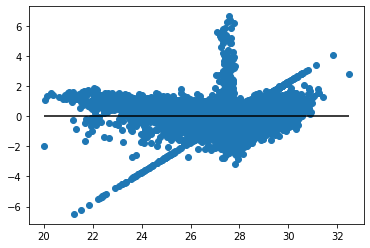

In [143]:
plt.scatter(y_pred, y_pred-y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())

In [149]:
import pandas as pd
new_df = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]

In [151]:
new_df.head(10)

,Predicted,Actual,Error
147093,27.810633,28.389999,-0.579367
120188,24.302358,23.709999,0.592359
173783,23.256038,22.930000,0.326038
17024,28.279058,29.139999,-0.860941
121252,23.652332,22.910000,0.742332
167302,29.552684,29.730000,-0.177316
157607,27.551428,29.230000,-1.678571
57988,24.990472,27.715136,-2.724664
42641,26.052627,25.719999,0.332627
128935,28.490102,28.799999,-0.309897
